In [283]:
import pandas as pd
import numpy
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import warnings
warnings.filterwarnings('ignore')

In [284]:
!pip install scikit-learn==1.3.0

Defaulting to user installation because normal site-packages is not writeable


In [285]:
data=pd.read_csv('iris.csv')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [286]:
data.columns=["Sepal_Length","Sepal_width","Petal_Length","Petal_width","species"]

In [333]:
data.tail(5)

,Sepal_Length,Sepal_width,Petal_Length,Petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [288]:
data.describe()

,Sepal_Length,Sepal_width,Petal_Length,Petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [289]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal_Length  150 non-null    float64
 1   Sepal_width   150 non-null    float64
 2   Petal_Length  150 non-null    float64
 3   Petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [290]:
data['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

# Preprocessing Dataset


In [291]:
data.isnull().sum()

Sepal_Length    0
Sepal_width     0
Petal_Length    0
Petal_width     0
species         0
dtype: int64

# Data Analysis

<Axes: >

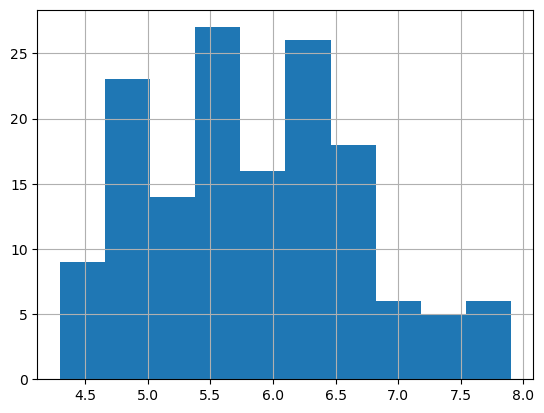

In [292]:
data['Sepal_Length'].hist()

<Axes: >

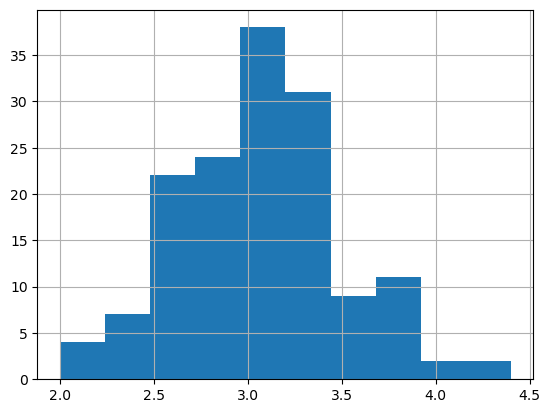

In [293]:
data['Sepal_width'].hist()

<Axes: >

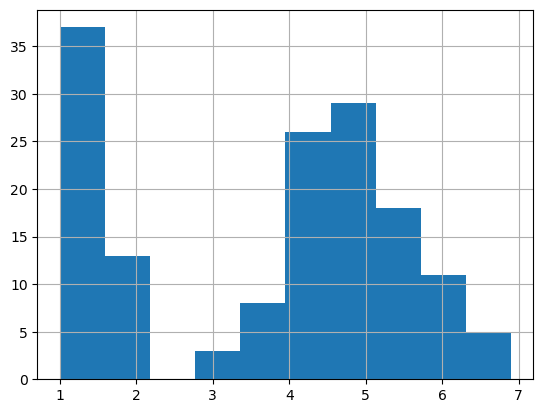

In [294]:
data['Petal_Length'].hist()

<Axes: >

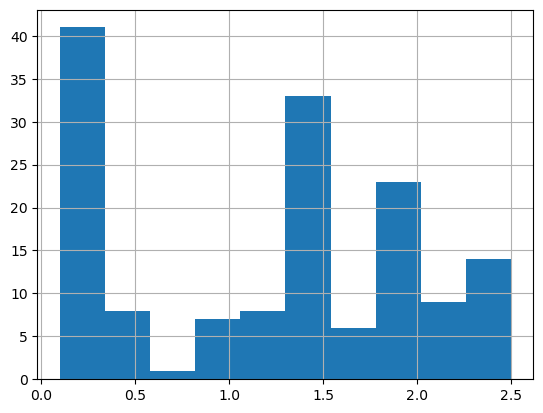

In [295]:
data['Petal_width'].hist()

In [296]:
colors=['red','orange','blue']
species=['virginica','versicolor','setosa']

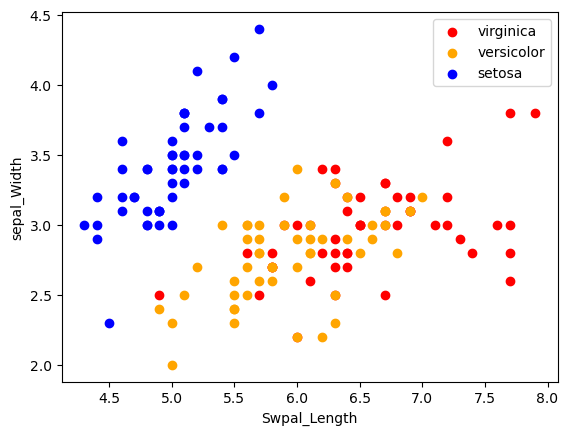

In [297]:
for i in range(3):
    x=data[data['species']==species[i]]
    
    plt.scatter(x['Sepal_Length'],x['Sepal_width'],c=colors[i],label=species[i])
plt.xlabel("Swpal_Length")
plt.ylabel("sepal_Width")
plt.legend()

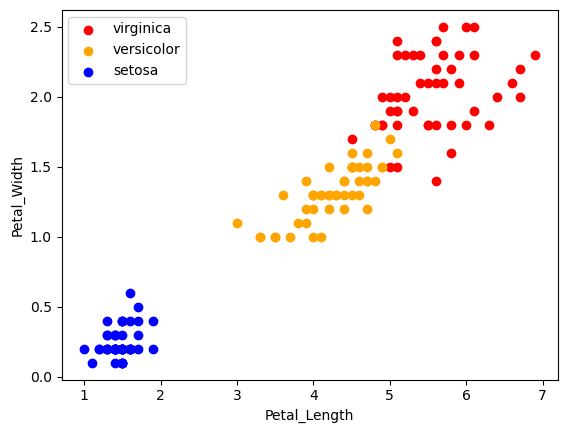

In [298]:
for i in range(3):
    x=data[data['species']==species[i]]
    
    plt.scatter(x['Petal_Length'],x['Petal_width'],c=colors[i],label=species[i])
plt.xlabel("Petal_Length")
plt.ylabel("Petal_Width")
plt.legend()

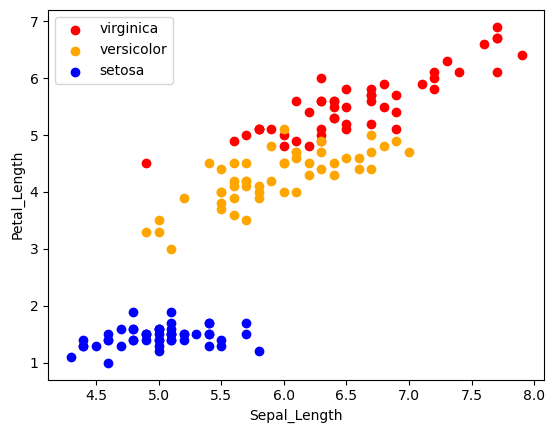

In [299]:
for i in range(3):
    X=data[data['species']==species[i]]
    
    plt.scatter(X['Sepal_Length'],X['Petal_Length'],c=colors[i],label=species[i])
plt.xlabel("Sepal_Length")
plt.ylabel("Petal_Length")
plt.legend()

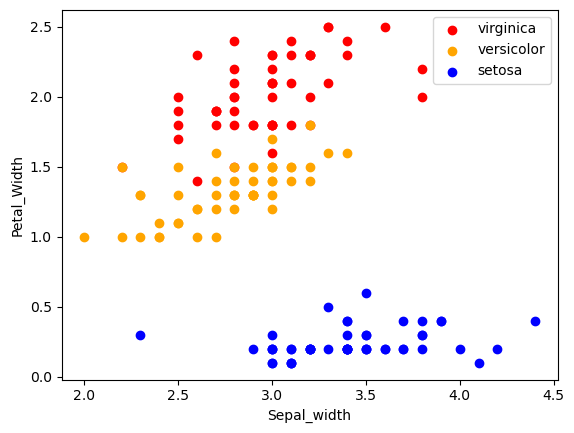

In [300]:
for i in range(3):
    X=data[data['species']==species[i]]
    
    plt.scatter(X['Sepal_width'],X['Petal_width'],c=colors[i],label=species[i])
plt.xlabel("Sepal_width")
plt.ylabel("Petal_Width")
plt.legend()

In [301]:
#data = data.apply(pd.to_numeric, errors='coerce')


In [302]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


<Axes: >

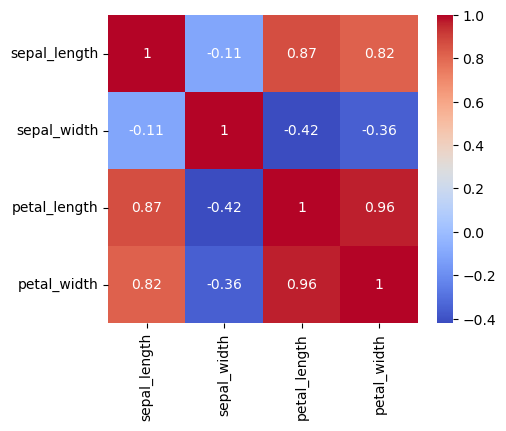

In [303]:
corr=df.corr()
fig,ax=plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot=True, ax=ax, cmap='coolwarm')

# Label Encoder

# Model training and Testing

In [304]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import pickle
X=data.drop(columns=['species'])

Y=data['species']
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.30)

In [305]:
model=LogisticRegression()
model.fit(x_train,y_train)
print("Logistic Regression Accuracy: ", model.score(x_test,y_test)*100)

Logistic Regression Accuracy:  88.88888888888889


In [306]:
model.fit(x_train.values,y_train.values)

LogisticRegression()

In [307]:
print("Accuracy: ", model.score(x_test,y_test)*100)

Accuracy:  88.88888888888889


In [308]:
model=KNeighborsClassifier()
model.fit(x_train.values, y_train.values)
print("Knn Accuracy: ", model.score(x_test,y_test)*100)

Knn Accuracy:  95.55555555555556


In [309]:
model.fit(x_train.values,y_train.values)

KNeighborsClassifier()

In [310]:
print("Accuracy: ", model.score(x_test,y_test)*100)

Accuracy:  95.55555555555556


In [311]:
model= DecisionTreeClassifier()
model.fit(x_train,y_train)
print("Logistic Regression Accuracy: ", model.score(x_test,y_test)*100)

Logistic Regression Accuracy:  88.88888888888889


In [312]:
model.fit(x_train.values,y_train.values)

DecisionTreeClassifier()

In [313]:
print("Accuracy: ", model.score(x_test,y_test)*100)

Accuracy:  93.33333333333333


In [314]:
import pickle
filename='saved_model.sav'
pickle.dump(model, open(filename,'wb'))

In [315]:
import pickle

In [316]:
filename='saved_model.sav'
try:
    with open(filename,'wb')as file:
        pickle.dump(model,file)
    print("model saved successfully. ")
except Exception as e:
    print(f"error saving the model:{e}")

model saved successfully. 


In [317]:
load_model=pickle.load(open(filename, 'rb'))

In [318]:
load_model.predict([[6.0,2.2,4.0,1.0]])

array(['versicolor'], dtype=object)

In [331]:
x_test.head()

,Sepal_Length,Sepal_width,Petal_Length,Petal_width
148,6.2,3.4,5.4,2.3
140,6.7,3.1,5.6,2.4
124,6.7,3.3,5.7,2.1
122,7.7,2.8,6.7,2.0
17,5.1,3.5,1.4,0.3


In [334]:
load_model.predict([[6.1,2.4,5.4,1.9]])

array(['virginica'], dtype=object)